In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
employee = read_csv('/content/drive/MyDrive/stock2vec/stock2vec-master/data/employee_data.csv')
employee.head()

,company,symbol,sector,market_cap,pe_ratio,number_of_employees,sec_filing,vector1,vector2,vector3,vector4
0,Walmart,WMT,Retail Trade,407.63,22.9,2200000.0,reports,0.829953,-1.023615,-0.031209,-1.269893
1,Amazon.com Inc.,AMZN,Retail Trade,1605.05,122.1,798000.0,reports,0.091421,-1.058599,-0.839604,0.834054
2,Accenture plc,ACN,Technology Services,151.35,28.9,506000.0,reports,0.228507,-0.474911,-0.782801,-2.162982
3,United Parcel Service,UPS,Transportation,148.41,34.4,495000.0,reports,0.212781,-0.739657,-0.670442,-2.129345
4,Kroger Co.,KR,Retail Trade,25.37,9.9,435000.0,reports,0.849830,-0.377965,-0.452920,0.417005


In [4]:
columns = ['Company', 'Symbol', 'Sector', 'MarketCap', 'PERatio', 'NumberOfEmployees', 'SecFiling','Vector1', 'Vector2', 'Vector3', 'Vector4']
employee.columns = columns
target = employee.pop("NumberOfEmployees")
employee.shape

(366, 10)

In [5]:
dataset = employee[['MarketCap', 'PERatio']]

In [6]:
dataset.head()

,MarketCap,PERatio
0,407.63,22.9
1,1605.05,122.1
2,151.35,28.9
3,148.41,34.4
4,25.37,9.9


In [7]:
# Split-out validation dataset
array = dataset.values
#X = array[:,0:11]
X = array
Y = target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [8]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      NumberOfEmployees   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     21.21
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.94e-09
Time:                        21:50:10   Log-Likelihood:                -4846.9
No. Observations:                 366   AIC:                             9700.
Df Residuals:                     363   BIC:                             9712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.272e+04   8254.598      5.175      0.0

In [9]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=edb214067d7d6dce20cce44083574dcee4a82c800c768222f89d8d48d7232ce2
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [10]:
model2 = LinearRegression()
model2.fit(dataset, target)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(dataset, Y,
test_size=validation_size, random_state=seed)
import rfpimp
imp = rfpimp.importances(model2, X_validation, Y_validation)
imp

,Importance
Feature,
MarketCap,0.308516
PERatio,0.000086


In [11]:
X_pred = model2.predict(X_validation)

In [12]:
#from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model2, hist=False, qqplot=True)
#visualizer = ResidualsPlot(model2)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
visualizer.show()  

ModuleNotFoundError: ignored

In [13]:
import plotly.express as px
fig = px.bar(imp, title="Permutation Feature Importance",
            labels={"x": "Number of Components", "y": "Cumulative Explained Variance"})
fig.update_traces(showlegend=False, selector=dict(type='bar'))
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_layout( title={'text':"Permutation Feature Importance",
                         'y':0.85,
                         'yanchor': 'top',
                         'x':0.5,
                         'xanchor': 'center'})
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                           'paper_bgcolor': 'rgba(0,0,0,0)'
                  })

fig.update_layout(
    xaxis_title="Employee Features",
    yaxis_title="Importance Score",
    font=dict(
        family="Time New",
        size=16,
        color="#000000"
    )
)

fig.show()

NameError: ignored

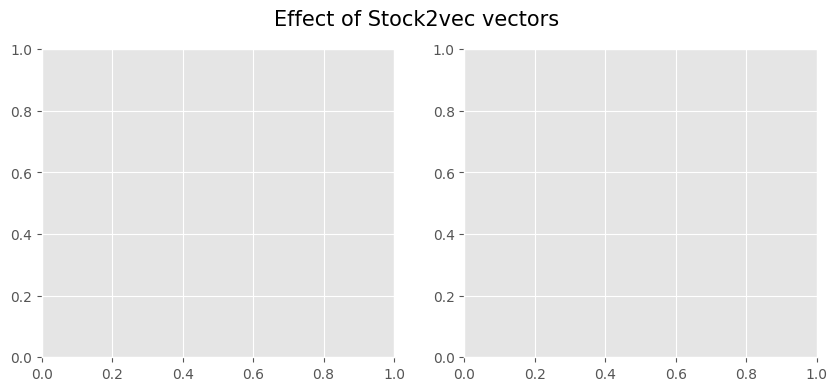

In [14]:
plt.style.use('default')
plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Effect of Stock2vec vectors', fontsize=15)

axes[0].plot(X_pred, response_1, color='k', label='Regression model')
axes[0].scatter(X2, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG data')
axes[0].set_ylabel('ESG rating', fontsize=14)
axes[0].set_xlabel('Vector1', fontsize=14)
axes[0].legend(facecolor='white', fontsize=11, loc='best')
axes[0].set_ylim(0, 60)
axes[0].set_xlim(0, 4)
axes[0].text(0.47, 0.15, '$y = %.1f x_1 + %.1f $' % (model_1.coef_[0], model_1.intercept_),
             fontsize=12, transform=axes[0].transAxes)
axes[0].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[0].transAxes, color='red', alpha=0.5)

axes[1].plot(x_pred3, response_2, color='k', label='Regression model')
axes[1].scatter(X3, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG Data')
axes[1].set_ylabel('ESG rating', fontsize=14)
axes[1].set_xlabel('Earnings per share', fontsize=14)
axes[1].legend(facecolor='white', fontsize=11, loc='best')
axes[1].set_ylim(0, 60)
axes[1].set_xlim(0, 20)
axes[1].text(0.55, 0.15, '$y = %.1f x_1 + %.1f $' % (model_2.coef_[0], model_2.intercept_),
             fontsize=12, transform=axes[1].transAxes)
axes[1].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[1].transAxes, color='red', alpha=0.5)

fig.tight_layout(rect=[0, 0, 1, 0.94])